# Machine Learning Model Evaluation

In [1]:
# read the data into a Pandas DataFrame
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']

pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
# print the first 5 rows of data from the dataframe
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Explanation of variables
label
1: diabetes
0: no diabetes
pregnant
number of times pregnant

In [3]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.label

In [4]:
# split X and y into training and testing sets
# note that the test split ratio is By default,is set to 0.25.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/gpfs/fs01/user/sa7d-9dd5fbf856b6db-aa3b21eda791/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

Classification accuracy: percentage of correct predictions

In [7]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


Null accuracy: accuracy that could be achieved by always predicting the most frequent class
This is (almost) equiavalent to a random classification

In [8]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()
# calculate the percentage of zeros
1 - y_test.mean()
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.67708333333333326

This means that a dumb model that always predicts 0 would be right 68% of the time
* This shows how classification accuracy is not that good as it's close to a dumb model
* It's a good way to know the minimum we should achieve with our models

### Confusion matrix
Table that describes the performance of a classification model

In [9]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [15]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
# TP: True Positive
TP = confusion[1, 1]
# TN: True Negative
TN = confusion[0, 0]
# FP: False Positive
FP = confusion[0, 1]
# FN: False Negative
FN = confusion[1, 0]
print("TP: ",TP,", TN: ",TN,", FP: ",FP,", FN: ",FN)

[[118  12]
 [ 47  15]]
('TP: ', 15, ', TN: ', 118, ', FP: ', 12, ', FN: ', 47)


In [17]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


In [18]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.307291666667
0.307291666667


Sensitivity: When the actual value is positive, how often is the prediction correct?
* Something we want to maximize
* How "sensitive" is the classifier to detecting positive instances?
* Also known as "True Positive Rate" or "Recall"
* TP / all positive
    * all positive = TP + FN

I'm using python 2 in this notebook and in Python 2, 25/100 is zero when performing an integer divison. since the result is less than 1.

That is why I using from __future__ import division. This will always perform a float division when using the / operator and use // for integer division.

Another option would be making at least one of the operands a float, e.g. 25.0/100.

In Python 3, 25/100 is always 0.25.

In [24]:
from __future__ import division
specificity = TN / (TN + FP)

print(TN / (TN + FP))

0.907692307692


precision or positive predictive value (PPV)

In [25]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


In [26]:
# Recall
# Recall is the fraction of the relevant instance that are successfully predicted 
print(TP/float(TP+FN))

0.241935483871


For more complete list of metrics see:
https://en.wikipedia.org/wiki/Precision_and_recall#Precision

In [27]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [28]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [29]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

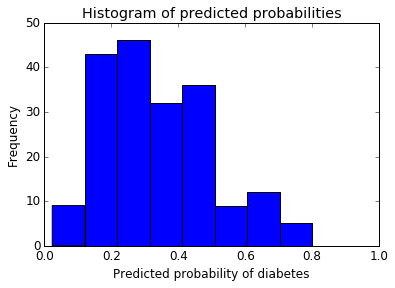

In [30]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

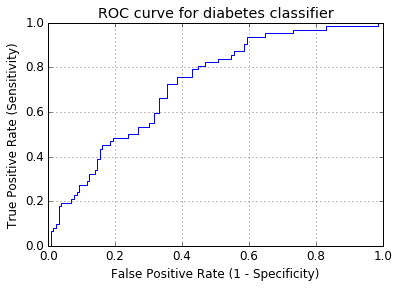

In [31]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
